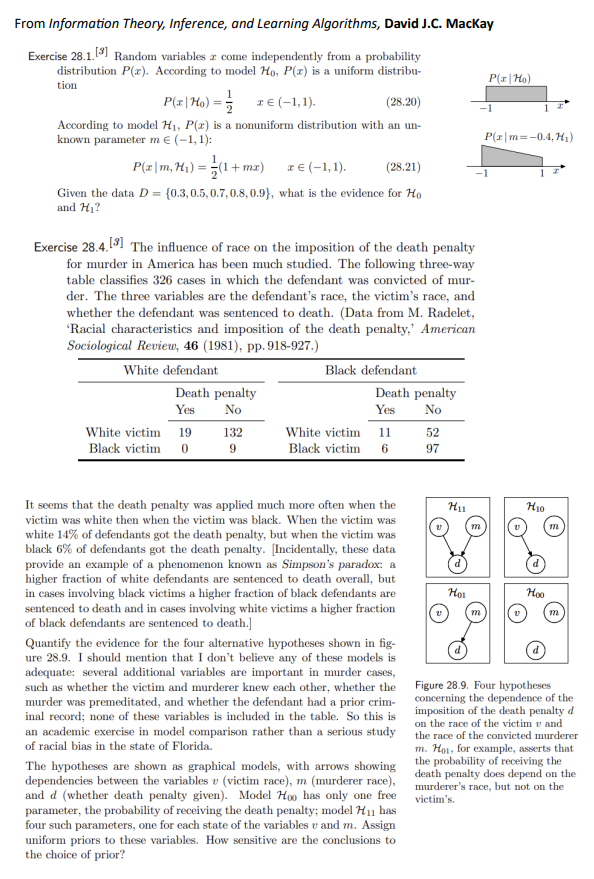

**To remeber: the best hypotesis have the greatest evidence**

# **Exercise 28.1**

In [ ]:
import numpy as np
from scipy.integrate import quad

data = np.array([0.3, 0.5, 0.7, 0.8, 0.9])

def prior(m): # Assuming a uniform prior
    return 1

def likelihood_H0(m):
    return np.prod([0.5 for x in data])

def likelihood_H1(m):
    return np.prod([0.5 * (1 + m * x) for x in data])

evidence_H0, _ = quad(lambda m: likelihood_H0(m) * prior(m), -1, 1)
evidence_H1, _ = quad(lambda m: likelihood_H1(m) * prior(m), -1, 1)

print(f"Evidence for H0: {evidence_H0}")
print(f"Evidence for H1: {evidence_H1}")

Evidence for H0: 0.0625
Evidence for H1: 0.1540379166666667


# **Exercise 28.4**

In [ ]:
import math

data = {'D_W_V_W_DP_Y': 19,
        'D_W_V_W_DP_N': 132,
        'D_W_V_B_DP_Y': 0,
        'D_W_V_B_DP_N': 0,
        'D_B_V_W_DP_Y': 11,
        'D_B_V_W_DP_N': 52,
        'D_B_V_B_DP_Y': 6,
        'D_B_V_B_DP_N': 97}

total_cases = sum(data.values())

# Likelihood calculations
epsilon = 1e-30

likelihood_H11 = ((data['D_W_V_W_DP_Y'] + epsilon) / max(1, data['D_W_V_W_DP_Y'] + data['D_W_V_W_DP_N'])) * \
                 ((data['D_W_V_B_DP_Y'] + epsilon) / max(1, data['D_W_V_B_DP_Y'] + data['D_W_V_B_DP_N'])) * \
                 ((data['D_B_V_W_DP_Y'] + epsilon) / max(1, data['D_B_V_W_DP_Y'] + data['D_B_V_W_DP_N'])) * \
                 ((data['D_B_V_B_DP_Y'] + epsilon) / max(1, data['D_B_V_B_DP_Y'] + data['D_B_V_B_DP_N']))

likelihood_H10 = ((data['D_W_V_W_DP_Y'] + data['D_B_V_W_DP_Y'] + epsilon) / max(1, data['D_W_V_W_DP_Y'] + data['D_W_V_W_DP_N']) + data['D_B_V_W_DP_Y'] + data['D_B_V_W_DP_N']) * \
                 ((data['D_W_V_B_DP_Y'] + data['D_B_V_B_DP_Y'] + epsilon) / max(1, data['D_W_V_B_DP_Y'] + data['D_W_V_B_DP_N']) + data['D_B_V_B_DP_Y'] + data['D_B_V_B_DP_N'])

likelihood_H01 = ((data['D_W_V_W_DP_Y'] + data['D_W_V_B_DP_Y'] + epsilon) / max(1, data['D_W_V_W_DP_Y'] + data['D_W_V_W_DP_N']) + data['D_W_V_B_DP_Y'] + data['D_W_V_B_DP_N']) * \
                 ((data['D_B_V_W_DP_Y'] + data['D_B_V_B_DP_Y'] + epsilon) / max(1, data['D_B_V_W_DP_Y'] + data['D_B_V_W_DP_N']) + data['D_B_V_B_DP_Y'] + data['D_B_V_B_DP_N'])

likelihood_H00 = (data['D_W_V_W_DP_Y'] + data['D_W_V_B_DP_Y'] + data['D_B_V_W_DP_Y'] + data['D_B_V_B_DP_Y']) / total_cases

# Number of parameters in each model
params_H11 = 4
params_H10 = 2
params_H01 = 2
params_H00 = 1

# Bayesian Information Criterion (BIC) // I preferred to calculate the Occam Factor using BIC instead of standard deviations, this method seemed easier to implement in this problem
BIC_H11 = -2 * math.log(likelihood_H11) + params_H11 * math.log(total_cases)
BIC_H10 = -2 * math.log(likelihood_H10) + params_H10 * math.log(total_cases)
BIC_H01 = -2 * math.log(likelihood_H01) + params_H01 * math.log(total_cases)
BIC_H00 = -2 * math.log(likelihood_H00) + params_H00 * math.log(total_cases)
min_BIC = min([BIC_H11, BIC_H10, BIC_H01, BIC_H00])

# Occam factors
Occam_H11 = math.exp(-0.5 * (min_BIC - BIC_H11))
Occam_H10 = math.exp(-0.5 * (min_BIC - BIC_H10))
Occam_H01 = math.exp(-0.5 * (min_BIC - BIC_H01))
Occam_H00 = math.exp(-0.5 * (min_BIC - BIC_H00))

# Evidence
prior = 0.1 # Assuming a uniform prior

evidence_H11 = likelihood_H11 * Occam_H11 * prior
evidence_H10 = likelihood_H10 * Occam_H10 * prior
evidence_H01 = likelihood_H01 * Occam_H01 * prior
evidence_H00 = likelihood_H00 * Occam_H00 * prior

print(f"Prior: {prior}")
print(f"Evidence for H11: {evidence_H11}")
print(f"Evidence for H10: {evidence_H10}")
print(f"Evidence for H01: {evidence_H01}")
print(f"Evidence for H00: {evidence_H00}")


Prior: 0.1
Evidence for H11: 218370.38344370923
Evidence for H10: 688.8655629139074
Evidence for H01: 688.8655629139071
Evidence for H00: 38.69054465017399


In [ ]:
prior = 1 # Assuming a uniform prior

evidence_H11 = likelihood_H11 * Occam_H11 * prior
evidence_H10 = likelihood_H10 * Occam_H10 * prior
evidence_H01 = likelihood_H01 * Occam_H01 * prior
evidence_H00 = likelihood_H00 * Occam_H00 * prior

print(f"Prior: {prior}")
print(f"Evidence for H11: {evidence_H11}")
print(f"Evidence for H10: {evidence_H10}")
print(f"Evidence for H01: {evidence_H01}")
print(f"Evidence for H00: {evidence_H00}")

Prior: 1
Evidence for H11: 2183703.8344370923
Evidence for H10: 6888.655629139073
Evidence for H01: 6888.65562913907
Evidence for H00: 386.9054465017399


In [ ]:
prior = 10 # Assuming a uniform prior

evidence_H11 = likelihood_H11 * Occam_H11 * prior
evidence_H10 = likelihood_H10 * Occam_H10 * prior
evidence_H01 = likelihood_H01 * Occam_H01 * prior
evidence_H00 = likelihood_H00 * Occam_H00 * prior

print(f"Prior: {prior}")
print(f"Evidence for H11: {evidence_H11}")
print(f"Evidence for H10: {evidence_H10}")
print(f"Evidence for H01: {evidence_H01}")
print(f"Evidence for H00: {evidence_H00}")

Prior: 10
Evidence for H11: 21837038.344370924
Evidence for H10: 68886.55629139073
Evidence for H01: 68886.5562913907
Evidence for H00: 3869.054465017399


In [ ]:
prior = 100 # Assuming a uniform prior

evidence_H11 = likelihood_H11 * Occam_H11 * prior
evidence_H10 = likelihood_H10 * Occam_H10 * prior
evidence_H01 = likelihood_H01 * Occam_H01 * prior
evidence_H00 = likelihood_H00 * Occam_H00 * prior

print(f"Prior: {prior}")
print(f"Evidence for H11: {evidence_H11}")
print(f"Evidence for H10: {evidence_H10}")
print(f"Evidence for H01: {evidence_H01}")
print(f"Evidence for H00: {evidence_H00}")

Prior: 100
Evidence for H11: 218370383.44370922
Evidence for H10: 688865.5629139073
Evidence for H01: 688865.562913907
Evidence for H00: 38690.54465017399


The classification of hypotheses remains the same regardless of the Prior.